In [1]:
import os 
os.chdir("..")


In [13]:
%load_ext autoreload
%autoreload 2
from numerics.integration.steps import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numerics.utilities.misc import *
import time
from scipy.special import erf
import pickle


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:

mode = "frequencies"
pars = give_def_params_discrimination(flip=0, mode = mode)
params, exp_path = check_params_discrimination(pars)
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params

dtt = 1e-6
total_time = 100.

total_time, dt = get_total_time_dt(params, dt=dtt, total_time=total_time)
times = np.arange(0, total_time+ dt, dt)


Ntraj = 10
boundsB= [10.]#np.arange(-4,4.1,.1)


stop = {}
stop["_0"] = {i:[] for i in range(1,Ntraj)}
stop["_1"] = {i:[] for i in range(1,Ntraj)}



er=[]
deter = {}
deter["h0/h1"] = {indb:[0]*len(indis) for indb in range(len(boundsB))}
deter["h1/h0"] = {indb:[0]*len(indis) for indb in range(len(boundsB))}



l0,l1 = np.zeros((2,len(times)+1))

indis = np.logspace(2,np.log10(len(times)-1), 100)
indis = [int(k) for k in indis]
timind = [times[ind] for ind in indis]

deter_data_h0_h1 = np.zeros((Ntraj, len(boundsB), len(indis)))#{indb:{ind:[] for ind in indis} for indb in range(len(boundsB))}#["h1/h0"] = {indb:[0]*len(indis) for indb in range(len(boundsB))}
deter_data_h1_h0 = np.zeros((Ntraj, len(boundsB), len(indis)))##{indb:{ind:[] for ind in indis} for indb in range(len(boundsB))}#["h1/h0"] = {indb:[0]*len(indis) for indb in range(len(boundsB))}



n=1
ers = []
for itraj in tqdm(range(1,Ntraj)):
    try:

        log_lik_ratio, log_lik_ratio_swap = load_liks(itraj, mode=mode, dtt=dtt, total_time_in=100.)

        for indb,b in enumerate(boundsB):
            if b>0:

                stop["_1"][itraj].append(get_stop_time(log_lik_ratio, b, times))
                stop["_0"][itraj].append(get_stop_time(log_lik_ratio_swap, b, times))

            for ind, time_index in enumerate(indis):
                deter_1 = log_lik_ratio[time_index] < b
                deter_0 = log_lik_ratio_swap[time_index] > b
                
                deter_data_h0_h1[itraj][indb][ind] = deter_1
                deter_data_h1_h0[itraj][indb][ind] = deter_0
                
                deter["h0/h1"][indb][ind] +=  (int(deter_1) - deter["h0/h1"][indb][ind] )/n
                deter["h1/h0"][indb][ind] += (int(deter_0) - deter["h1/h0"][indb][ind])/n
        l1= l1 + log_lik_ratio
        l0 = l0 +log_lik_ratio_swap
        n+=1
    except Exception:
        ers.append(itraj)
l0/=(Ntraj - len(ers))
l1/=(Ntraj - len(ers))

100%|██████████| 9/9 [00:00<00:00, 16.04it/s]


In [26]:
log_lik_ratio, log_lik_ratio_swap = load_liks(itraj, mode=mode, dtt=dtt, total_time_in=100.)


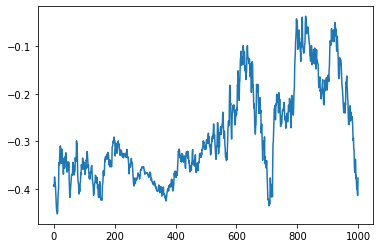

In [32]:
plt.plot(log_lik_ratio[1000:2000])

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


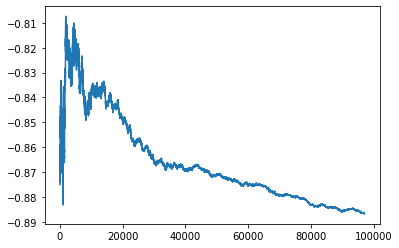

In [19]:
plt.plot((l1/l0)[3000:])

In [101]:
get_def_path()

'/data/uab-giq/scratch/matias/quantera/trajectories/discrimination/'

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


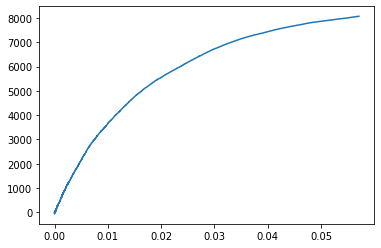

In [47]:
ax=plt.subplot(111)
ax.plot(times,(l1[:-1])/times)
#ax.set_xscale("log")

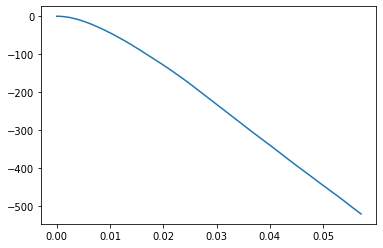

In [50]:
plt.plot(times,l0[:-1])
#plt.plot(times,l1[:-1])

In [ ]:
path = get_def_path()+"results_stopping_time/{}/{}_stats_boundsB_{}_{}_{}/".format(mode,len(stops1),min(boundsB), max(boundsB), len(boundsB))
path_data = get_def_path()+"results_stopping_time/{}/{}_stats_boundsB_{}_{}_{}/data/".format(mode,len(stops1), min(boundsB), max(boundsB), len(boundsB))
all_datapath_data = get_def_path()+"results_stopping_time/{}/{}_stats_boundsB_{}_{}_{}/data/".format(mode,len(stops1), min(boundsB), max(boundsB), len(boundsB))

os.makedirs(path,exist_ok=True)
os.makedirs(path_data,exist_ok=True)


with open(path_data+"stop.pickle","wb") as f:
    pickle.dump(stop, f, protocol=pickle.HIGHEST_PROTOCOL)
    

with open(path_data+"deter.pickle","wb") as f:
    pickle.dump(deter, f, protocol=pickle.HIGHEST_PROTOCOL)
    
np.save(path_data+"timbin", timbin1)
np.save(path_data+"cons", cons1)
np.save(path_data+"timbin", timbin0)
np.save(path_data+"cons", cons0)


In [52]:
mode = "frequencies"
pars = give_def_params_discrimination(flip=0, mode = mode)
params, exp_path = check_params_discrimination(pars)
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params

dtt = 1e-6
total_time = 100.

total_time, dt = get_total_time_dt(params, dt=dtt, total_time=total_time)
times = np.arange(0, total_time+ dt, dt)


Ntraj = 1000
boundsB= np.arange(-4,4.1,.1)

indis = np.logspace(2,np.log10(len(times)-1), 100)
indis = [int(k) for k in indis]
timind = [times[ind] for ind in indis]
bpos = boundsB[boundsB>=0]
bneg = boundsB[boundsB<0]

path = get_def_path()+"results_stopping_time/{}/{}_stats_boundsB_{}_{}_{}/".format(mode,len(bpos),min(boundsB), max(boundsB), len(boundsB))
path_data = get_def_path()+"results_stopping_time/{}/{}_stats_boundsB_{}_{}_{}/data/".format(mode,len(bpos), min(boundsB), max(boundsB), len(boundsB))

with open(path_data+"stop.pickle","rb") as f:
    stop = pickle.load(f)#, protocol=pickle.HIGHEST_PROTOCOL)
    

with open(path_data+"deter.pickle","rb") as f:
    deter = pickle.load(f)#, protocol=pickle.HIGHEST_PROTOCOL)
    
timbin1 = np.load(path_data+"timbin.npy")
cons1 = np.load(path_data+"cons.npy")#, cons1)
timbin0 = np.load(path_data+"timbin.npy")#, timbin0)
cons0 = np.load(path_data+"cons.npy")#, cons0)


In [99]:
exp_path

'[[100, 11000.0, 1, 1, 1000000.0], [100, 10000.0, 1, 1, 1000000.0]]/'

In [95]:
def probAns(t, b, kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1, mu=None):
    
    Su1 = n1 + 0.5 + (kappa1 / gamma1)
    Su0 = n0 + 0.5 + (kappa0 / gamma0)

    S1 = (np.sqrt(1 + (16.0*eta1*kappa1*Su1/gamma1)) - 1)*(gamma1/(8.0*eta1*kappa1))
    S0 = (np.sqrt(1 + (16.0*eta0*kappa0*Su0/gamma0)) - 1)*( gamma0/(8.0*eta0*kappa0))

    lam = gamma0 + (8*eta0*kappa0*S0)

    aa = (4*eta1*kappa1*(S1**2))/gamma1
    bb =(4*eta0*kappa0*S0**2)*(1+((16.0*eta1*kappa1*S1)/ (gamma1 + lam)) + (64.0*(eta1 * kappa1 * S1)**(2)/(gamma1 * (gamma1 + lam))))/ lam
    c =8 *(S0*S1*(eta0*kappa0 *eta1*kappa1)**(0.5)) * (gamma1+ (4.0*eta1*kappa1*S1) ) / ((gamma1 + lam)*gamma1)

    if mu==None:
        mu = 4*(eta1*kappa1*aa + (eta0*kappa0*bb) - 2*np.sqrt(eta1*kappa1*eta0*kappa0)*c)
    else:
        pass
    S= np.sqrt(2*mu)

    div = (np.sqrt(2*np.pi)*S*(t**(3/2)))
    return  abs(b)*np.exp(-((abs(b)-mu*t)**2)/(2*t*(S**2)))/div

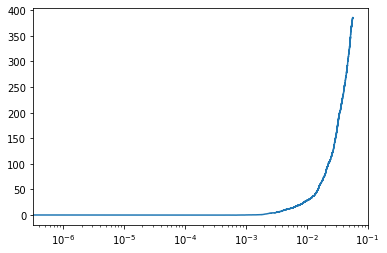

In [96]:
ax=plt.subplot(111)
ax.plot(times, l1[:-1])
ax.set_xscale("log")

In [97]:
last = (l1[:-1]/times)[-1]
gp1 =[probAns(t, 10, kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1, mu=8*10**6) for t in timind]

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [84]:
bpos = boundsB[boundsB>0]
bneg = boundsB[boundsB<0]
stops0 = [[] for k in range(len(bpos))]
stops1 = [[] for k in range(len(bpos))]

values1 = list(stop["_1"].values())
values0 = list(stop["_0"].values())
for k,val in enumerate(values1):
    if len(val)!=0:
        for indb in range(len(val)):
            if ~np.isnan([values1[k][indb]])[0] == True:
                stops1[indb].append(np.squeeze(values1[k][indb]))
        
for k,val in enumerate(values0):
    if len(val)!=0:
        for indb in range(len(val)):
            if ~np.isnan([values0[k][indb]])[0] == True:
                stops0[indb].append(np.squeeze(values0[k][indb]))


cons1, cons0 = [], []
anals1, anals0 = [], []
timbin0, timbin1 = [], []
for indb, b in enumerate(boundsB[-2:-1]):#[int(len(boundsB)/2):]):
    counts1, bins1 = np.histogram(stops1[indb], 50, normed=True)
    counts0, bins0 = np.histogram(stops0[indb], 50, normed=True)
    
    timms1 = np.linspace(0,np.max(bins1), 100)
    timms0 = np.linspace(0,np.max(bins0), 100)
    
    timbins1 = .5*(bins1[1:] + bins1[:-1])
    timbins0 = .5*(bins0[1:] + bins0[:-1])
    
    cons1.append(counts1)
    cons0.append(counts0)
    
    timbin1.append(timbins1)
    timbin0.append(timbins0)
    
    #gp1 =[prob(t, b, kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1)[0] for t in timms1]
    #anals1.append(gp1)
    
    #gp0 = [prob(t, b, kappa1, kappa0, eta1 , eta0, n1, n0, gamma1, gamma0)[0] for t in timms0]
    #anals0.append(gp0)
    

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


In [85]:
bsel = boundsB[-2]# boundsB[int(len(boundsB)/2):][3]
last = (l1[:-1]/times)[-1]
gp1 =[probAns(t, bsel, kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1, mu=last) for t in timbin1[indb]]

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


In [110]:
dtt = 1e-6
total_time = 100.

total_time, dt = get_total_time_dt(params, dt=dtt, total_time=total_time)
covs = np.load(get_path_config(total_time=total_time, dt = dt, itraj=10, exp_path=exp_path)+"covs1.npy")

In [112]:
global cc 
cc = covs[-1]

In [115]:
covs

array([[0.500025, 0.500025, 0.      ],
       [0.500025, 0.500025, 0.      ],
       [0.500025, 0.500025, 0.      ],
       ...,
       [0.500025, 0.500025, 0.      ],
       [0.500025, 0.500025, 0.      ],
       [0.500025, 0.500025, 0.      ]])

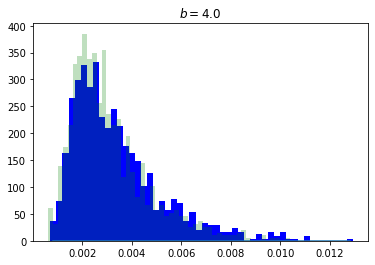

In [66]:
inb = 3
ax = plt.subplot(111)
ax.set_title('$b=$'+str(np.round(b,2)))
ax.bar(timbin1[indb], cons1[indb], width=timbin1[indb][1]-timbin1[indb][0], color="blue", alpha=1,label=r'$P(\tau|H1)$')
ax.bar(timbin0[indb], cons0[indb], width=timbin0[indb][1]-timbin0[indb][0], color="green", alpha=0.25, label=r'$P(\tau|H0)$')
ax.plot(timbin1[indb], gp1)

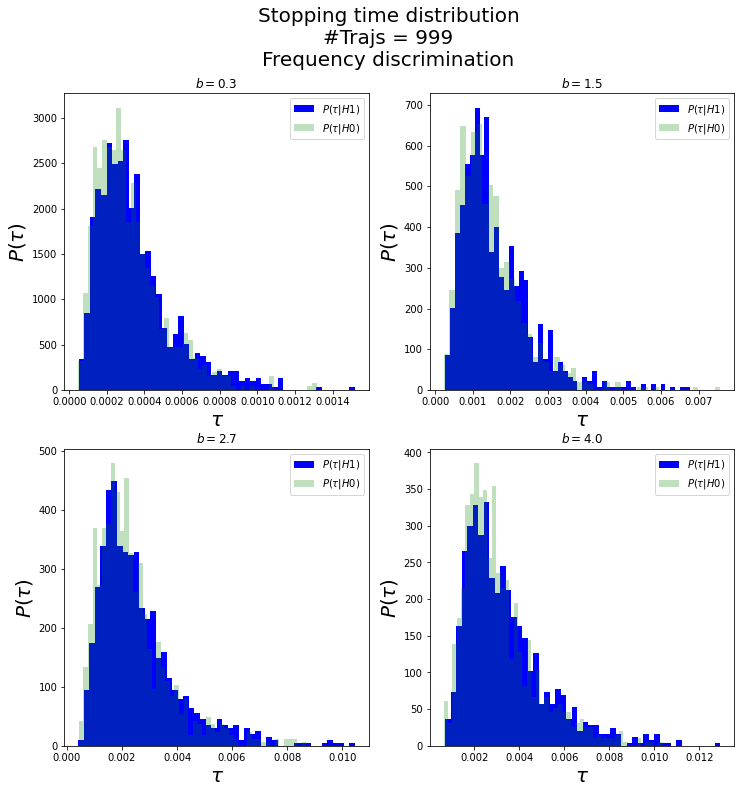

In [61]:
plt.figure(figsize=(12,12))
plt.suptitle("Stopping time distribution\n#Trajs = {}\nFrequency discrimination".format(len(stops1[0])),size=20)
axx = [221, 222, 223, 224]
indisb=[int(k) for k in np.linspace(3,len(bpos)-1, 4)]
selected_b = [bpos[int(k)] for k in indisb]
c=-1
for indb, b in zip(indisb, selected_b):
    c+=1
    ax = plt.subplot(axx[c])
    ax.set_title('$b=$'+str(np.round(b,2)))
    ax.bar(timbin1[indb], cons1[indb], width=timbin1[indb][1]-timbin1[indb][0], color="blue", alpha=1,label=r'$P(\tau|H1)$')
    ax.bar(timbin0[indb], cons0[indb], width=timbin0[indb][1]-timbin0[indb][0], color="green", alpha=0.25, label=r'$P(\tau|H0)$')
    
    ax.set_xlabel(r'$\tau$',size=20)
    ax.set_ylabel(r'$P(\tau)$', size=20)
    ax.legend(prop={"size":10})
#plt.savefig(path+"stopping_times_distributions.pdf")

In [17]:
mode = "frequencies"
pars = give_def_params_discrimination(flip=0, mode = mode)
params, exp_path = check_params_discrimination(pars)
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params

dtt = 1e-6
total_time = 100.

total_time, dt = get_total_time_dt(params, dt=dtt, total_time=total_time)
times = np.arange(0, total_time+ dt, dt)


Ntraj = 1000
boundsB= np.arange(-4,4.1,.1)

lenn=41
path = get_def_path()+"results_stopping_time/{}/{}_stats_boundsB_{}_{}_{}/".format(mode,lenn,min(boundsB), max(boundsB), len(boundsB))
path_data = get_def_path()+"results_stopping_time/{}/{}_stats_boundsB_{}_{}_{}/data/".format(mode,lenn, min(boundsB), max(boundsB), len(boundsB))


with open(path_data+"stop.pickle","rb") as f:
    stop = pickle.load(f)
    

with open(path_data+"deter.pickle","rb") as f:
    deter = pickle.load(f)
    
timbin = np.load(path_data+"timbin.npy")
cons1 =np.load(path_data+"cons.npy")
timbin0 = np.load(path_data+"timbin.npy")
cons0 = np.load(path_data+"cons.npy")


In [ ]:
deter["h0/h1"]

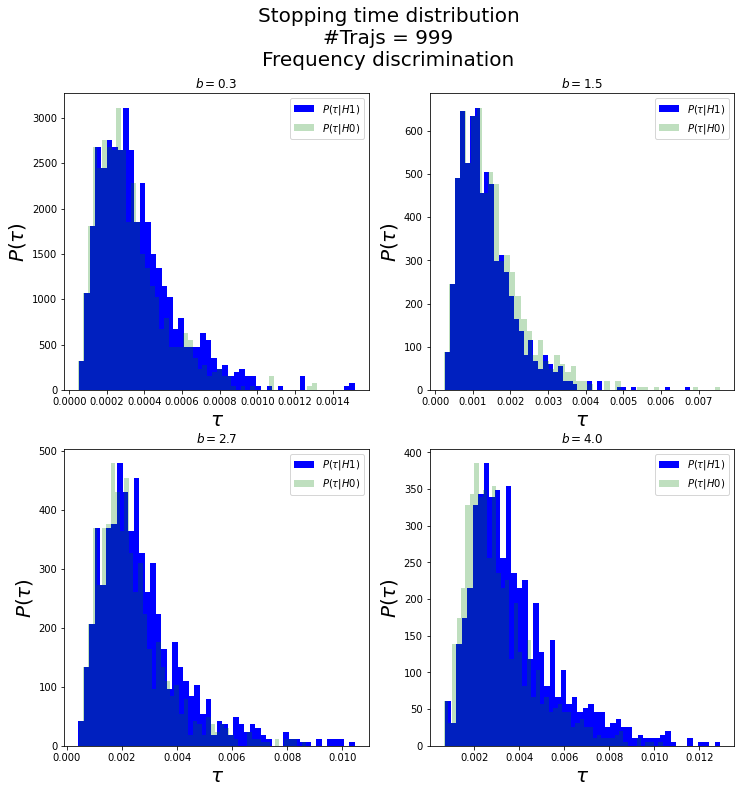

In [18]:
plt.figure(figsize=(12,12))
plt.suptitle("Stopping time distribution\n#Trajs = {}\nFrequency discrimination".format(len(stops1[0])),size=20)
axx = [221, 222, 223, 224]
indisb=[int(k) for k in np.linspace(3,len(bpos)-1, 4)]
selected_b = [bpos[int(k)] for k in indisb]
c=-1
for indb, b in zip(indisb, selected_b):
    c+=1
    ax = plt.subplot(axx[c])
    ax.set_title('$b=$'+str(np.round(b,2)))
    ax.bar(timbin1[indb], cons1[indb], width=timbin1[indb][1]-timbin1[indb][0], color="blue", alpha=1,label=r'$P(\tau|H1)$')
    ax.bar(timbin0[indb], cons0[indb], width=timbin0[indb][1]-timbin0[indb][0], color="green", alpha=0.25, label=r'$P(\tau|H0)$')
    
    ax.set_xlabel(r'$\tau$',size=20)
    ax.set_ylabel(r'$P(\tau)$', size=20)
    ax.legend(prop={"size":10})
#plt.savefig(path+"stopping_times_distributions.pdf")

In [332]:
alphas = list(deter["h0/h1"].values())
betas = list(deter["h1/h0"].values())


alphas = np.stack(alphas)
betas = np.stack(betas)

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_lau

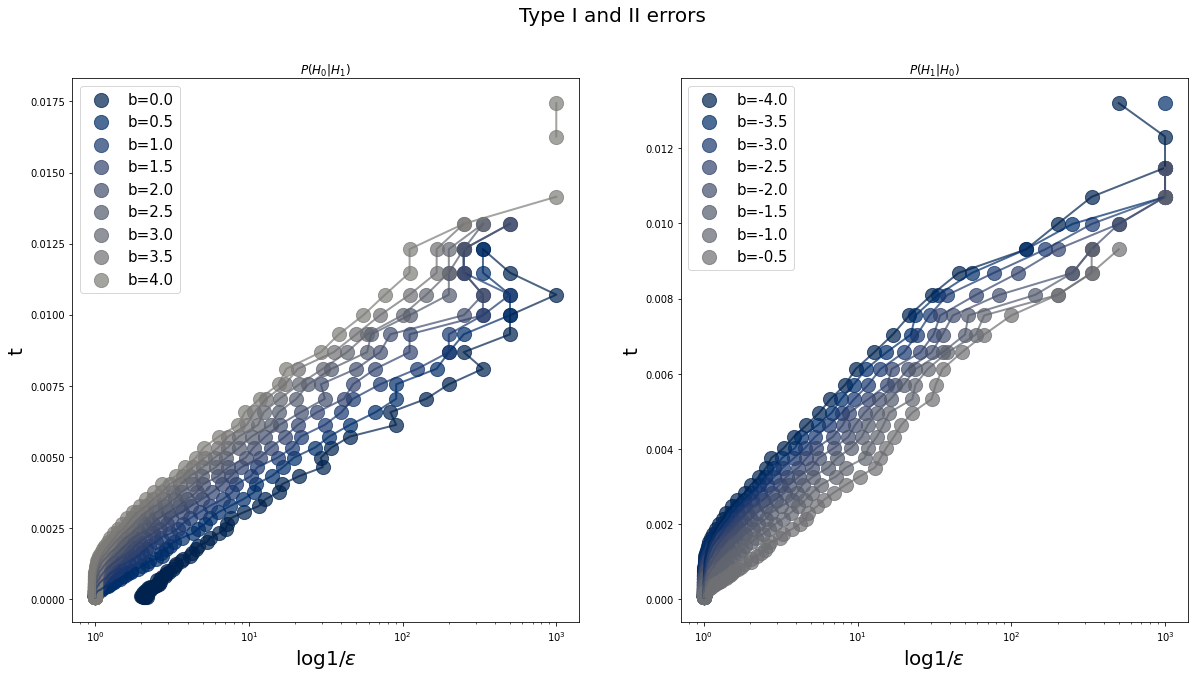

In [333]:
maps = plt.get_cmap("cividis")

plt.figure(figsize=(20,10))
plt.suptitle("Type I and II errors", size=20)
ax=plt.subplot(121)
ax.set_title(r'$P(H_0|H_1)$')

maps = plt.get_cmap("cividis")
colors = maps(np.linspace(0,1,len(boundsB)))

indboundsplot = list(range(0,len(boundsB)))[::5]
boundsplot = [boundsB[int(k)] for k in indboundsplot]
colors = maps(np.linspace(0,1,len(boundsplot)))
c=-1

for k, b in zip(indboundsplot, boundsplot):
    if b>0:
        c+=1
        ax.scatter(1/alphas[k,:],timind,  color=colors[c], s=200, alpha=0.7, label="b={}".format(np.round(b,2)))
        ax.plot(1/alphas[k,:],timind,  color=colors[c], linewidth=2, alpha=0.7)#, label="b={}".format(np.round(b,2)))
ax.legend(prop={"size":15})
ax.set_xscale("log")
ax.set_xlabel(r'$\log 1/\epsilon$',size=20)
ax.set_ylabel("t",size=20)



ax=plt.subplot(122)
ax.set_title(r'$P(H_1|H_0)$')
indboundsplot = list(range(0,len(boundsB)))[::5]
boundsplot = [boundsB[int(k)] for k in indboundsplot]
colors = maps(np.linspace(0,1,len(boundsplot)))
c=-1

for k, b in zip(indboundsplot, boundsplot):
    if b<0:
        c+=1
        ax.scatter(1/betas[k,:],timind,  color=colors[c], s=200, alpha=0.7, label="b={}".format(np.round(b,2)))
        ax.plot(1/betas[k,:],timind,  color=colors[c], linewidth=2, alpha=0.7)
ax.legend(prop={"size":15})
ax.set_xscale("log")
ax.set_xlabel(r'$\log 1/\epsilon$',size=20)
ax.set_ylabel("t",size=20)
plt.savefig(path+"assymetric_errors.pdf")

In [334]:
avg_err_alpha = lambda o: (1-np.exp(-o))/(np.exp(o) - np.exp(-o))
avg_err_beta= lambda o: (1-np.exp(o))/(np.exp(o) - np.exp(-o))

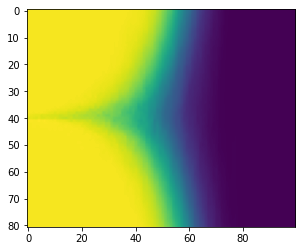

In [340]:
plt.imshow(0.5*(alphas + betas))

In [354]:
avg_err_alpha = lambda o: (1-np.exp(-abs(o)))/(np.exp(abs(o)) - np.exp(-abs(o)))
avg_err_beta= lambda o: (1-np.exp(-abs(o)))/(-np.exp(-abs(o)) + np.exp(abs(o)))

errs = 0.5*np.array([avg_err_alpha(b) + avg_err_beta(b) for b in boundsB])

In [356]:
tot_err = 0.5*(alphas + betas)
times_to_errs = [timind[np.argmin(np.abs(tot_err[indb,:] - errs[indb]))] for indb in range(len(boundsB))]

In [374]:
avg_times1 = np.array([np.mean(k) for k in stops1])
avg_times0 = np.array([np.mean(k) for k in stops0])

std_times1 = np.array([np.std(k) for k in stops1])
std_times0 = np.array([np.std(k) for k in stops0])

In [388]:
avg_times = 0.5*(avg_times0 + avg_times1)

std_times = np.sqrt(std_times1**2   + std_times0**2)#0.5*(np.array(avg_times0) + np.array(avg_times1) )
stoch = avg_times
stoch_std = std_times

In [389]:
errs = 0.5*np.array([avg_err_alpha(b) + avg_err_beta(b) for b in bpos])
tot_err = 0.5*(alphas + betas)
times_to_errs = [timind[np.argmin(np.abs(tot_err[indb,:] - errs[indb]))] for indb in range(len(bpos))]

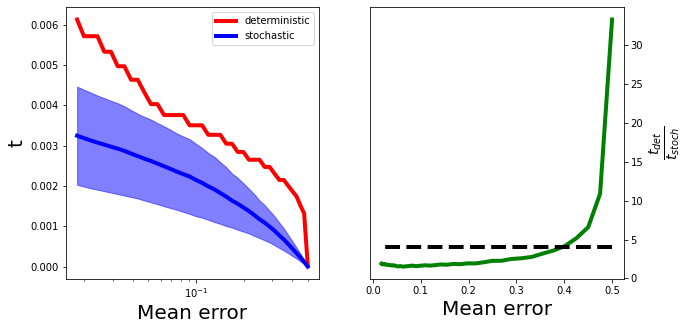

In [390]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(121)

ax.plot(errs, times_to_errs, color="red", linewidth=4,label="deterministic")
ax.plot(errs, stoch, color="blue", linewidth=4, label="stochastic")
ax.fill_between(errs, stoch - stoch_std/2, stoch + stoch_std/2, alpha=0.5, color="blue")
ax.set_xscale("log")
ax.set_xlabel("Mean error", size=20)
ax.set_ylabel("t", size=20)
ax.legend()

ax = plt.subplot(122)
ax.plot(errs, times_to_errs/stoch, linewidth=4, color="green")
ax.plot(errs, np.ones(len(stoch))*4,  '--', linewidth=4,color="black")
ax.set_xlabel("Mean error", size=20)
ax.set_ylabel(r'$\frac{t_{det}}{t_{stoch}}$', size=20)

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

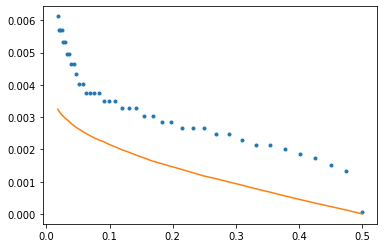

In [373]:
plt.plot(errs, times_to_errs,'.')
plt.plot(errs, avg_times)

In [313]:
bpos = boundsB[boundsB>0]
bneg = boundsB[boundsB<0][::-1]

In [318]:
bpos[1:]

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. ])

In [314]:
bneg

array([-0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1. , -1.1,
       -1.2, -1.3, -1.4, -1.5, -1.6, -1.7, -1.8, -1.9, -2. , -2.1, -2.2,
       -2.3, -2.4, -2.5, -2.6, -2.7, -2.8, -2.9, -3. , -3.1, -3.2, -3.3,
       -3.4, -3.5, -3.6, -3.7, -3.8, -3.9, -4. ])

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(121)
stoch =  np.mean(stops1, axis=0)
stoch_std = np.std(stops1, axis=0)
ax.plot(errs, times_alpha_to_errB, color="red", linewidth=4,label="deterministic")
ax.plot(errs, stoch, color="blue", linewidth=4, label="stochastic")
ax.fill_between(errs, stoch - stoch_std/2, stoch + stoch_std/2, alpha=0.5, color="blue")
ax.set_xscale("log")
ax.set_xlabel("Mean error", size=20)
ax.set_ylabel("t", size=20)
ax.legend()

ax = plt.subplot(122)
ax.plot(errs, times_alpha_to_errB/stoch, linewidth=4, color="green")
ax.plot(errs, np.ones(len(stoch))*4,  '--', linewidth=4,color="black")
ax.set_xlabel("Mean error", size=20)
ax.set_ylabel(r'$\frac{t_{det}}{t_{stoch}}$', size=20)

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()